In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

In [4]:
#Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [8]:
#Split the data intotrining /testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)


#Train/validation split
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
#Validate the model
score_train_val = model.score(X_test,y_test)
print(f'Train/Validation score : {score_train_val}')

Train/Validation score : 0.5757877060324524


In [11]:
#k-fold cross validation
scores_cv = cross_val_score(LinearRegression(),X,y,cv=10)

#print each of the scores and the average score
print(f'cross-validation score : {scores_cv}')
print(f'average cross-validtion score : {np.mean(scores_cv)}')


cross-validation score : [0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]
average cross-validtion score : 0.5110068610523775


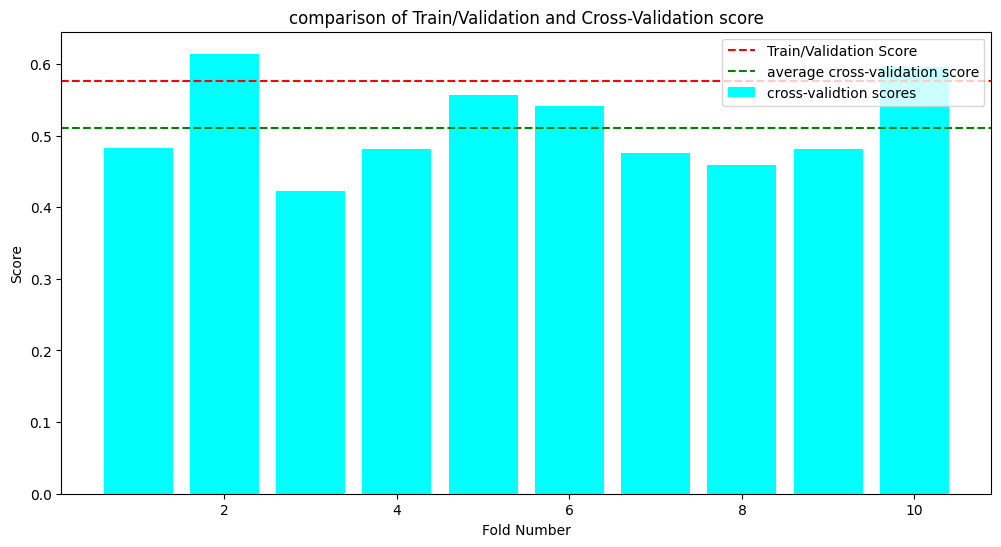

In [12]:
#visualize score
plt.figure(figsize=(12,6))
plt.bar(range(1,11),scores_cv,color='cyan',label='cross-validtion scores')
plt.axhline(y=score_train_val , color='red',linestyle='--',label='Train/Validation Score')
plt.axhline(y=np.mean(scores_cv),color='green',linestyle='--',label='average cross-validation score' )
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.legend()
plt.title('comparison of Train/Validation and Cross-Validation score')
plt.show()